# PROYECTO INTEGRADOR DE LA ESPECIALIZACIÓN EN MACHINE LEARNING Y DEEP LEARNING

# 1. Entendimiento del Negocio

**Describir el problema y el área de negocio:**


>  El departamento de informacion y tecnologia del banco obtuvo un aumento de envíos de solicitudes de tickets errados en los últimos tres meses, después de la introducción de la nueva herramienta para administrar tickets de servicio para todos los departamentos organizacionales.




**Objetivos del Negocio basado:**


> Optimizar el trabajo






# 2. Comprensión y preparación de los Datos

## 2.1. Fuentes de datos

**Fuentes internas**, Los datos se extrayeron del Software para gestión de servicios y TI, Aranda Software. Los datos son referentes a problemas, requerimientos e incidentes reportados.



## Librerías

In [ ]:
!pip install catboost

     |████████████████████████████████| 76.3 MB 21 kB/s 


In [ ]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
from math import sqrt

import warnings
warnings.filterwarnings('ignore')
from scipy import stats

## Modelos de Machine Learning
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from catboost import CatBoostClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from statsmodels.stats.weightstats import ttest_ind
from statsmodels.stats.outliers_influence import variance_inflation_factor

# visualization
import seaborn as sns
import matplotlib.pyplot as plt

#Metricas de evaluación
from sklearn.metrics import mean_squared_error
from sklearn import metrics
from sklearn.metrics import r2_score

#separar train and test
from sklearn.model_selection import train_test_split

# estadística y matemáticas
#import pandas as pd
import scipy.stats as scy
from scipy.stats import kurtosis

In [ ]:
# Columnas a mostrar
#pd.options.display.max_columns = 50
#pd.options.display.max_rows = 50

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Leer datos del negocio

In [ ]:
## data
data = pd.read_excel('/content/drive/MyDrive/Machine_Learning_DMC/TRABAJO/DATA.xlsx')
data.head()

,PROYECTO,NUMERO_DEL_CASO,ID_interno_del_caso,TIPO_DE_CASO,CATEGORIA,JERARQUIA,DESCRIPCION,NOMBRE_AUTOR,NOMBRE_RECEPTOR,ESPECIALISTA,GRUPO_ESPECIALISTA,ESTADO,RAZON,COMPANIA,PAIS_COMPANIA,USUARIO,USUARIO_Alias,PAIS_USUARIO,DEPARTAMENTO_USUARIO,SUCURSAL_USUARIO,SEDE_USUARIO,EDIFICIO_USUARIO,FECHA_REGISTRO,TIPO_REGISTRO,FECHA_CIERRE,ULTIMO_PASO_DEL_DBManager,FECHA_ATENCION,FECHA_SOLUCION,IMPACTO,URGENCIA,PRIORIDAD,SERVICIO,SLA_Nombre,FECHA_MAX_SOLUCION,FECHA_MAX_ATENCION,TIEMPO_DEL_CASO,PROGRESO_DEL_CASO,TIEMPO_DE_ATENCION_ESTIMADO,TIEMPO_DE_ATENCION_REAL,TIEMPO_DE_SOLUCION_ESTIMADO,TIEMPO_DE_SOLUCION_REAL,ULTIMA_LLAMADA_ASOCIADA,ULTIMA_INCIDENTE_ASOCIADO,ULTIMO_PROBLEMA_ASOCIADO,ULTIMO_CAMBIO_ASOCIADO,COMENTARIO_DE_LA_SOLUCION,CI_ASOCIADO,CAUSA,COMITE_PASE,INCIDENTE_MASIVO,CUMPLE
0,_MESADEAYUDA_,105.0,52149.0,PROBLEMA,ACR,Aplicaciones de Negocio.Aplicaciones Varias.ACR,Día de Inicio: 07/05/2021 Hora de Inicio: 5:50...,"ARAPA, PAMELA","ALFARO, MIGUEL","ALFARO, MIGUEL",Desarrollo TI Soluciones,Solucionado,Permanente,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2021-05-21 08:12:12.497000,Mail,NaN,2021-11-05 17:59:38.500000,2021-05-21 08:12:50.730000,2021-06-09 11:35:27.400000,HIGH,LOW,LOW,I_APLICACION DE NEGOCIO (ALTA),120 Días,2021-11-12 18:00:00,2021-08-17 18:00:00,7175.0,11.0,32400.0,0.0,32400.0,7175.0,NaN,122262.0,NaN,NaN,Día de solución: 07/05/2021 Hora de solución: ...,Aplicaciones,Conexión,2021-08-07,NaN,DENTRO
1,_MESADEAYUDA_,98.0,52107.0,PROBLEMA,Auro,Aplicaciones de Negocio.Aplicaciones Varias.Auro,Día de Inicio: 06/05/2021Hora de Inicio: 9:00 ...,"ARAPA, PAMELA","YAURI, JOSE","YAURI, JOSE",Desarrollo TI Soluciones,Solucionado,Por excepción,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2021-05-20 14:58:56.080000,Mail,NaN,2021-11-05 17:59:38.500000,2021-05-20 14:59:37.583000,2021-06-04 09:54:15.690000,CRITICAL,LOW,LOW,I_APLICACION DE NEGOCIO (ALTA),120 Días,2021-11-12 14:58:56,2021-08-17 14:58:56,5635.0,8.0,32400.0,0.0,32400.0,5635.0,NaN,122218.0,NaN,NaN,"De: TAKAHASHI, MASASHI Enviado el: viernes, ...",Aplicaciones,Mejora Técnica,NaT,NaN,DENTRO
2,_MESADEAYUDA_,86.0,52072.0,PROBLEMA,Auro,Aplicaciones de Negocio.Aplicaciones Varias.Auro,Día de Inicio:20/04/2021 Hora de Inicio:10:00a...,"GARCIA, JOSE","YAURI, JOSE","YAURI, JOSE",Desarrollo TI Soluciones,Desarrollo,Temporal,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2021-05-20 12:09:21.420000,Mail,NaN,2021-11-05 17:59:38.500000,2021-05-20 12:12:19.387000,NaN,CRITICAL,LOW,LOW,I_APLICACION DE NEGOCIO (ALTA),120 Días,2021-11-12 12:09:21,2021-08-17 12:09:21,62450.0,96.0,32400.0,2.0,32400.0,0.0,NaN,121539.0,NaN,NaN,NaN,Aplicaciones,NaN,2021-11-04,NaN,DENTRO
3,_MESADEAYUDA_,143.0,53983.0,PROBLEMA,Auro,Aplicaciones de Negocio.Aplicaciones Varias.Auro,Día de Inicio: 4/5/2021 Hora de Inicio: Servic...,"ROJAS, MANUEL","YAURI, JOSE","YAURI, JOSE",Desarrollo TI Soluciones,Solucionado,Por excepción,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2021-06-11 19:02:27.500000,Mail,NaN,2021-11-05 17:59:38.500000,2021-06-11 19:02:50.953000,2021-06-24 15:16:02.753000,CRITICAL,LOW,LOW,I_APLICACION DE NEGOCIO (ALTA),120 Días,2021-12-06 18:00:00,2021-09-09 18:00:00,4696.0,7.0,32400.0,0.0,32400.0,4696.0,NaN,123262.0,NaN,NaN,Se desestima el Problema [PRB-143] Incidente [...,Aplicaciones,No se identifica Causa raíz,NaT,NaN,DENTRO
4,_MESADEAYUDA_,108.0,52209.0,PROBLEMA,Autoriza ATM,Aplicaciones de Negocio.Aplicaciones Varias.Au...,Día de Inicio: 23/12/2020Hora de Inicio: -Apli...,"HOLGUIN, EVELYN","RUIZ OJEDA, FERNANDO","RUIZ OJEDA, FERNANDO",Desarrollo TI Canales y CRM,Solucionado,Permanente,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2021-05-21 16:26:39.710000,Mail,NaN,2021-11-05 17:59:38.500000,2021-05-21 16:27:23.470000,2021-07-07 11:24:13.080000,CRITICAL,LOW,LOW,I_APLICACION DE NEGOCIO (ALTA),120 Días,2021-11-15 16:26:39,2021-08-18 16:26:39,16977.0,26.0,32400.0,0.0,32400.0,16977.0,NaN,117331.0,NaN,NaN,Día de Solución: 07/07/2021 Hora de Solución: ...,Aplicaciones,Pase a Producción,2021-07-03,NaN,DENTRO


## 2.2. Análisis exploratorio de los datos

In [ ]:
data.shape #Observamos la cantidad de datos que tenemos tanto en filas y columnas

(660, 51)

In [ ]:
data.columns

Index(['PROYECTO', 'NUMERO_DEL_CASO', 'ID_interno_del_caso', 'TIPO_DE_CASO',
       'CATEGORIA', 'JERARQUIA', 'DESCRIPCION', 'NOMBRE_AUTOR',
       'NOMBRE_RECEPTOR', 'ESPECIALISTA', 'GRUPO_ESPECIALISTA', 'ESTADO',
       'RAZON', 'COMPANIA', 'PAIS_COMPANIA', 'USUARIO', 'USUARIO_Alias',
       'PAIS_USUARIO', 'DEPARTAMENTO_USUARIO', 'SUCURSAL_USUARIO',
       'SEDE_USUARIO', 'EDIFICIO_USUARIO', 'FECHA_REGISTRO', 'TIPO_REGISTRO',
       'FECHA_CIERRE', 'ULTIMO_PASO_DEL_DBManager', 'FECHA_ATENCION',
       'FECHA_SOLUCION', 'IMPACTO', 'URGENCIA', 'PRIORIDAD', 'SERVICIO',
       'SLA_Nombre', 'FECHA_MAX_SOLUCION', 'FECHA_MAX_ATENCION',
       'TIEMPO_DEL_CASO', 'PROGRESO_DEL_CASO', 'TIEMPO_DE_ATENCION_ESTIMADO',
       'TIEMPO_DE_ATENCION_REAL', 'TIEMPO_DE_SOLUCION_ESTIMADO',
       'TIEMPO_DE_SOLUCION_REAL', 'ULTIMA_LLAMADA_ASOCIADA',
       'ULTIMA_INCIDENTE_ASOCIADO', 'ULTIMO_PROBLEMA_ASOCIADO',
       'ULTIMO_CAMBIO_ASOCIADO', 'COMENTARIO_DE_LA_SOLUCION', 'CI_ASOCIADO',
       'CAUSA'

In [ ]:
data.dtypes ## Observamos el tipo de variables que tenemos

PROYECTO                               object
NUMERO_DEL_CASO                       float64
ID_interno_del_caso                   float64
TIPO_DE_CASO                           object
CATEGORIA                              object
JERARQUIA                              object
DESCRIPCION                            object
NOMBRE_AUTOR                           object
NOMBRE_RECEPTOR                        object
ESPECIALISTA                           object
GRUPO_ESPECIALISTA                     object
ESTADO                                 object
RAZON                                  object
COMPANIA                               object
PAIS_COMPANIA                         float64
USUARIO                                object
USUARIO_Alias                          object
PAIS_USUARIO                          float64
DEPARTAMENTO_USUARIO                   object
SUCURSAL_USUARIO                       object
SEDE_USUARIO                          float64
EDIFICIO_USUARIO                  

In [ ]:
data.info() ## Cantidad e variables y tipos de ellas

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 660 entries, 0 to 659
Data columns (total 51 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   PROYECTO                     660 non-null    object        
 1   NUMERO_DEL_CASO              659 non-null    float64       
 2   ID_interno_del_caso          659 non-null    float64       
 3   TIPO_DE_CASO                 659 non-null    object        
 4   CATEGORIA                    659 non-null    object        
 5   JERARQUIA                    660 non-null    object        
 6   DESCRIPCION                  660 non-null    object        
 7   NOMBRE_AUTOR                 659 non-null    object        
 8   NOMBRE_RECEPTOR              659 non-null    object        
 9   ESPECIALISTA                 659 non-null    object        
 10  GRUPO_ESPECIALISTA           659 non-null    object        
 11  ESTADO                       659 non-null    

In [ ]:
data.dropna(subset=['TIPO_DE_CASO'], inplace=True)
data.shape

(659, 51)

In [ ]:
data.isnull().sum().sum() ## Cantidad de datos nulos

9225

In [ ]:
print("Número de observaciones o filas= {}".format(data.shape[0]))
print("Total de variables disponibles = {}".format(data.columns.shape[0]))
print("Columnas que cuentan con algún valor nulo-")
print(data.isnull().sum())

Número de observaciones o filas= 659
Total de variables disponibles = 51
Columnas que cuentan con algún valor nulo-
PROYECTO                         0
NUMERO_DEL_CASO                  0
ID_interno_del_caso              0
TIPO_DE_CASO                     0
CATEGORIA                        0
JERARQUIA                        0
DESCRIPCION                      0
NOMBRE_AUTOR                     0
NOMBRE_RECEPTOR                  0
ESPECIALISTA                     0
GRUPO_ESPECIALISTA               0
ESTADO                           0
RAZON                            1
COMPANIA                       438
PAIS_COMPANIA                  659
USUARIO                        309
USUARIO_Alias                  309
PAIS_USUARIO                   659
DEPARTAMENTO_USUARIO           385
SUCURSAL_USUARIO               313
SEDE_USUARIO                   659
EDIFICIO_USUARIO               652
FECHA_REGISTRO                   0
TIPO_REGISTRO                    0
FECHA_CIERRE                   470
ULTIMO_PA

In [ ]:
data[data.duplicated()].shape

(18, 51)

In [ ]:
## Validamos si los registros son únicos.En nuestro caso hay datos repetidos
len(data.ID_interno_del_caso.drop_duplicates())

641

In [ ]:
data.drop_duplicates(inplace= True)  ### Eliminamos duplciados
data.shape

(641, 51)

In [ ]:
## Devuelve la cantidad de valores únicos en el índice
data.ID_interno_del_caso.nunique()

641

In [ ]:
data_asoc = data[['CATEGORIA', 'TIPO_DE_CASO', 'ULTIMO_PROBLEMA_ASOCIADO']]
data_asoc.rename(columns = {'CATEGORIA':'Cat_Asociada', 'TIPO_DE_CASO':'Caso_Asociado'}, inplace = True)
data_asoc['Cat_Asociada'] = data_asoc['Cat_Asociada'] + '_asoc'     ## Modificamos lo valores para los asociados
data_asoc['Caso_Asociado'] = data_asoc['Caso_Asociado'] + '_asoc'   ## Modificamos lo valores para los asociados

data_asoc['Cat_Asociada'] = np.where(data_asoc.ULTIMO_PROBLEMA_ASOCIADO.isnull(), 'Ninguno', data_asoc['Cat_Asociada'])
data_asoc['Caso_Asociado'] = np.where(data_asoc.ULTIMO_PROBLEMA_ASOCIADO.isnull(), 'Ninguno', data_asoc['Caso_Asociado'])

data_asoc.head()

,Cat_Asociada,Caso_Asociado,ULTIMO_PROBLEMA_ASOCIADO
0,Ninguno,Ninguno,NaN
1,Ninguno,Ninguno,NaN
2,Ninguno,Ninguno,NaN
3,Ninguno,Ninguno,NaN
4,Ninguno,Ninguno,NaN


In [ ]:
data_x = pd.concat([data, data_asoc.drop(['ULTIMO_PROBLEMA_ASOCIADO'], axis = 1)], axis = 1)
data_x.head()

,PROYECTO,NUMERO_DEL_CASO,ID_interno_del_caso,TIPO_DE_CASO,CATEGORIA,JERARQUIA,DESCRIPCION,NOMBRE_AUTOR,NOMBRE_RECEPTOR,ESPECIALISTA,GRUPO_ESPECIALISTA,ESTADO,RAZON,COMPANIA,PAIS_COMPANIA,USUARIO,USUARIO_Alias,PAIS_USUARIO,DEPARTAMENTO_USUARIO,SUCURSAL_USUARIO,SEDE_USUARIO,EDIFICIO_USUARIO,FECHA_REGISTRO,TIPO_REGISTRO,FECHA_CIERRE,ULTIMO_PASO_DEL_DBManager,FECHA_ATENCION,FECHA_SOLUCION,IMPACTO,URGENCIA,PRIORIDAD,SERVICIO,SLA_Nombre,FECHA_MAX_SOLUCION,FECHA_MAX_ATENCION,TIEMPO_DEL_CASO,PROGRESO_DEL_CASO,TIEMPO_DE_ATENCION_ESTIMADO,TIEMPO_DE_ATENCION_REAL,TIEMPO_DE_SOLUCION_ESTIMADO,TIEMPO_DE_SOLUCION_REAL,ULTIMA_LLAMADA_ASOCIADA,ULTIMA_INCIDENTE_ASOCIADO,ULTIMO_PROBLEMA_ASOCIADO,ULTIMO_CAMBIO_ASOCIADO,COMENTARIO_DE_LA_SOLUCION,CI_ASOCIADO,CAUSA,COMITE_PASE,INCIDENTE_MASIVO,CUMPLE,Cat_Asociada,Caso_Asociado
0,_MESADEAYUDA_,105.0,52149.0,PROBLEMA,ACR,Aplicaciones de Negocio.Aplicaciones Varias.ACR,Día de Inicio: 07/05/2021 Hora de Inicio: 5:50...,"ARAPA, PAMELA","ALFARO, MIGUEL","ALFARO, MIGUEL",Desarrollo TI Soluciones,Solucionado,Permanente,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2021-05-21 08:12:12.497000,Mail,NaN,2021-11-05 17:59:38.500000,2021-05-21 08:12:50.730000,2021-06-09 11:35:27.400000,HIGH,LOW,LOW,I_APLICACION DE NEGOCIO (ALTA),120 Días,2021-11-12 18:00:00,2021-08-17 18:00:00,7175.0,11.0,32400.0,0.0,32400.0,7175.0,NaN,122262.0,NaN,NaN,Día de solución: 07/05/2021 Hora de solución: ...,Aplicaciones,Conexión,2021-08-07,NaN,DENTRO,Ninguno,Ninguno
1,_MESADEAYUDA_,98.0,52107.0,PROBLEMA,Auro,Aplicaciones de Negocio.Aplicaciones Varias.Auro,Día de Inicio: 06/05/2021Hora de Inicio: 9:00 ...,"ARAPA, PAMELA","YAURI, JOSE","YAURI, JOSE",Desarrollo TI Soluciones,Solucionado,Por excepción,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2021-05-20 14:58:56.080000,Mail,NaN,2021-11-05 17:59:38.500000,2021-05-20 14:59:37.583000,2021-06-04 09:54:15.690000,CRITICAL,LOW,LOW,I_APLICACION DE NEGOCIO (ALTA),120 Días,2021-11-12 14:58:56,2021-08-17 14:58:56,5635.0,8.0,32400.0,0.0,32400.0,5635.0,NaN,122218.0,NaN,NaN,"De: TAKAHASHI, MASASHI Enviado el: viernes, ...",Aplicaciones,Mejora Técnica,NaT,NaN,DENTRO,Ninguno,Ninguno
2,_MESADEAYUDA_,86.0,52072.0,PROBLEMA,Auro,Aplicaciones de Negocio.Aplicaciones Varias.Auro,Día de Inicio:20/04/2021 Hora de Inicio:10:00a...,"GARCIA, JOSE","YAURI, JOSE","YAURI, JOSE",Desarrollo TI Soluciones,Desarrollo,Temporal,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2021-05-20 12:09:21.420000,Mail,NaN,2021-11-05 17:59:38.500000,2021-05-20 12:12:19.387000,NaN,CRITICAL,LOW,LOW,I_APLICACION DE NEGOCIO (ALTA),120 Días,2021-11-12 12:09:21,2021-08-17 12:09:21,62450.0,96.0,32400.0,2.0,32400.0,0.0,NaN,121539.0,NaN,NaN,NaN,Aplicaciones,NaN,2021-11-04,NaN,DENTRO,Ninguno,Ninguno
3,_MESADEAYUDA_,143.0,53983.0,PROBLEMA,Auro,Aplicaciones de Negocio.Aplicaciones Varias.Auro,Día de Inicio: 4/5/2021 Hora de Inicio: Servic...,"ROJAS, MANUEL","YAURI, JOSE","YAURI, JOSE",Desarrollo TI Soluciones,Solucionado,Por excepción,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2021-06-11 19:02:27.500000,Mail,NaN,2021-11-05 17:59:38.500000,2021-06-11 19:02:50.953000,2021-06-24 15:16:02.753000,CRITICAL,LOW,LOW,I_APLICACION DE NEGOCIO (ALTA),120 Días,2021-12-06 18:00:00,2021-09-09 18:00:00,4696.0,7.0,32400.0,0.0,32400.0,4696.0,NaN,123262.0,NaN,NaN,Se desestima el Problema [PRB-143] Incidente [...,Aplicaciones,No se identifica Causa raíz,NaT,NaN,DENTRO,Ninguno,Ninguno
4,_MESADEAYUDA_,108.0,52209.0,PROBLEMA,Autoriza ATM,Aplicaciones de Negocio.Aplicaciones Varias.Au...,Día de Inicio: 23/12/2020Hora de Inicio: -Apli...,"HOLGUIN, EVELYN","RUIZ OJEDA, FERNANDO","RUIZ OJEDA, FERNANDO",Desarrollo TI Canales y CRM,Solucionado,Permanente,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2021-05-21 16:26:39.710000,Mail,NaN,2021-11-05 17:59:38.500000,2021-05-21 16:27:23.470000,2021-07-07 11:24:13.080000,CRITICAL,LOW,LOW,I_APLICACION DE NEGOCIO (ALTA),120 Días,2021-11-15 16:26:39,2021-08-18 16:26:39,16977.0,26.0,32400.0,0.0,32400.0,16977.0,NaN,117331.0,NaN,NaN,Día de Solución: 07/07/2021 Hora de Solución: ...,A

In [ ]:
#### Variables Independientes
y = ['TIPO_DE_CASO']
x = ['CATEGORIA', 'JERARQUIA', 'GRUPO_ESPECIALISTA',
     'TIPO_REGISTRO', 'IMPACTO', 'URGENCIA', 'PRIORIDAD', 'SERVICIO',
     'SLA_Nombre', 'TIEMPO_DE_ATENCION_ESTIMADO', #CONVERT NUMERIC
     'TIEMPO_DE_SOLUCION_ESTIMADO', 'ULTIMO_PROBLEMA_ASOCIADO', #dicotomica
     'CAUSA', 'INCIDENTE_MASIVO', 'CUMPLE']

numerics = ['SLA_Nombre', 'TIEMPO_DE_ATENCION_ESTIMADO', 'TIEMPO_DE_SOLUCION_ESTIMADO']

label_encoder = ['TIPO_DE_CASO', 'URGENCIA', 'PRIORIDAD', 'IMPACTO']

onehot_encoder = ['CATEGORIA', 'JERARQUIA', 'GRUPO_ESPECIALISTA', 'TIPO_REGISTRO',
                  'SERVICIO', 'ULTIMO_PROBLEMA_ASOCIADO',
                  'CAUSA', 'INCIDENTE_MASIVO', 'CUMPLE']

## 2.3. Tratamiento de datos nulos

In [ ]:
dataset = data[(data['RAZON'] != 'Duplicado') & (data['RAZON'] != 'No es incidente') & (data['RAZON'] != 'NULL')]
dataset = dataset[x+y]

In [ ]:
dataset.isnull().sum()

CATEGORIA                        0
JERARQUIA                        0
GRUPO_ESPECIALISTA               0
TIPO_REGISTRO                    0
IMPACTO                          0
URGENCIA                         0
PRIORIDAD                        0
SERVICIO                         0
SLA_Nombre                       0
TIEMPO_DE_ATENCION_ESTIMADO      0
TIEMPO_DE_SOLUCION_ESTIMADO      0
ULTIMO_PROBLEMA_ASOCIADO       593
CAUSA                          408
INCIDENTE_MASIVO               623
CUMPLE                           1
TIPO_DE_CASO                     0
dtype: int64

In [ ]:
## Reemplazando Nulls
dataset['ULTIMO_PROBLEMA_ASOCIADO'] = np.where(dataset.ULTIMO_PROBLEMA_ASOCIADO.isnull(), 'Ninguno', 'Con_Antecedente')
dataset['INCIDENTE_MASIVO'] = np.where(dataset.INCIDENTE_MASIVO.isnull(), 'No', dataset['INCIDENTE_MASIVO'])
dataset['CUMPLE'] = np.where(dataset.CUMPLE.isnull(), dataset['CUMPLE'].mode(), dataset['CUMPLE'])
dataset['CAUSA'] = np.where(dataset.CAUSA.isnull(), 'No Identificado', dataset['CAUSA'])

In [ ]:
dataset.head()

,CATEGORIA,JERARQUIA,GRUPO_ESPECIALISTA,TIPO_REGISTRO,IMPACTO,URGENCIA,PRIORIDAD,SERVICIO,SLA_Nombre,TIEMPO_DE_ATENCION_ESTIMADO,TIEMPO_DE_SOLUCION_ESTIMADO,ULTIMO_PROBLEMA_ASOCIADO,CAUSA,INCIDENTE_MASIVO,CUMPLE,TIPO_DE_CASO
0,ACR,Aplicaciones de Negocio.Aplicaciones Varias.ACR,Desarrollo TI Soluciones,Mail,HIGH,LOW,LOW,I_APLICACION DE NEGOCIO (ALTA),120 Días,32400.0,32400.0,Ninguno,Conexión,No,DENTRO,PROBLEMA
1,Auro,Aplicaciones de Negocio.Aplicaciones Varias.Auro,Desarrollo TI Soluciones,Mail,CRITICAL,LOW,LOW,I_APLICACION DE NEGOCIO (ALTA),120 Días,32400.0,32400.0,Ninguno,Mejora Técnica,No,DENTRO,PROBLEMA
2,Auro,Aplicaciones de Negocio.Aplicaciones Varias.Auro,Desarrollo TI Soluciones,Mail,CRITICAL,LOW,LOW,I_APLICACION DE NEGOCIO (ALTA),120 Días,32400.0,32400.0,Ninguno,No Identificado,No,DENTRO,PROBLEMA
3,Auro,Aplicaciones de Negocio.Aplicaciones Varias.Auro,Desarrollo TI Soluciones,Mail,CRITICAL,LOW,LOW,I_APLICACION DE NEGOCIO (ALTA),120 Días,32400.0,32400.0,Ninguno,No se identifica Causa raíz,No,DENTRO,PROBLEMA
4,Autoriza ATM,Aplicaciones de Negocio.Aplicaciones Varias.Au...,Desarrollo TI Canales y CRM,Mail,CRITICAL,LOW,LOW,I_APLICACION DE NEGOCIO (ALTA),120 Días,32400.0,32400.0,Ninguno,Pase a Producción,No,DENTRO,PROBLEMA


In [ ]:
dataset.reset_index(inplace= True)
dataset.drop(['index'], axis = 1, inplace= True)
dataset.isnull().sum()

CATEGORIA                      0
JERARQUIA                      0
GRUPO_ESPECIALISTA             0
TIPO_REGISTRO                  0
IMPACTO                        0
URGENCIA                       0
PRIORIDAD                      0
SERVICIO                       0
SLA_Nombre                     0
TIEMPO_DE_ATENCION_ESTIMADO    0
TIEMPO_DE_SOLUCION_ESTIMADO    0
ULTIMO_PROBLEMA_ASOCIADO       0
CAUSA                          0
INCIDENTE_MASIVO               0
CUMPLE                         0
TIPO_DE_CASO                   0
dtype: int64

In [ ]:
dataset['SLA_Nombre'] = dataset['SLA_Nombre'].str.extract('(\d+)').astype(int)

In [ ]:
dataset.dtypes

CATEGORIA                       object
JERARQUIA                       object
GRUPO_ESPECIALISTA              object
TIPO_REGISTRO                   object
IMPACTO                         object
URGENCIA                        object
PRIORIDAD                       object
SERVICIO                        object
SLA_Nombre                       int64
TIEMPO_DE_ATENCION_ESTIMADO    float64
TIEMPO_DE_SOLUCION_ESTIMADO    float64
ULTIMO_PROBLEMA_ASOCIADO        object
CAUSA                           object
INCIDENTE_MASIVO                object
CUMPLE                          object
TIPO_DE_CASO                    object
dtype: object

## 2.4. Tratamiento de valores atípicos

In [ ]:
dataset.shape

(625, 16)

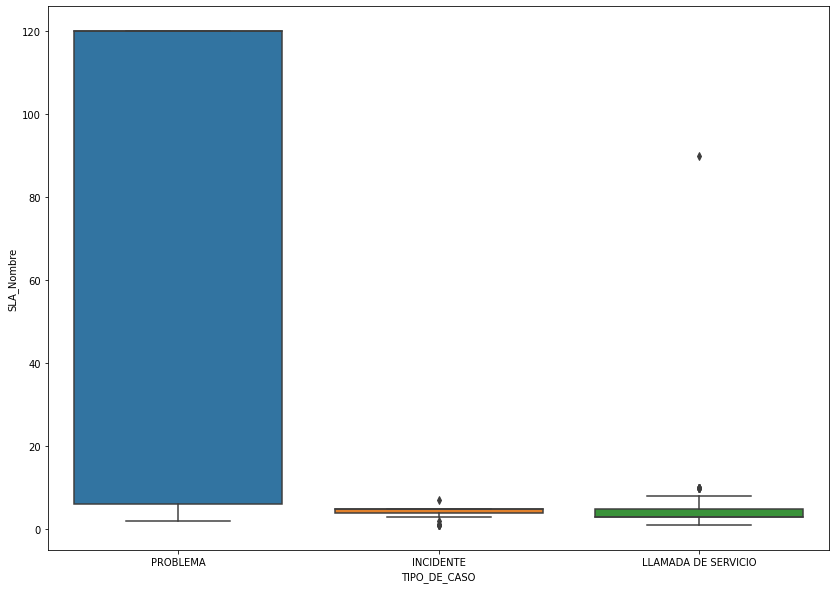

In [ ]:
plt.figure(figsize=(14,10))

sns.boxplot('TIPO_DE_CASO', 'SLA_Nombre', data = dataset)

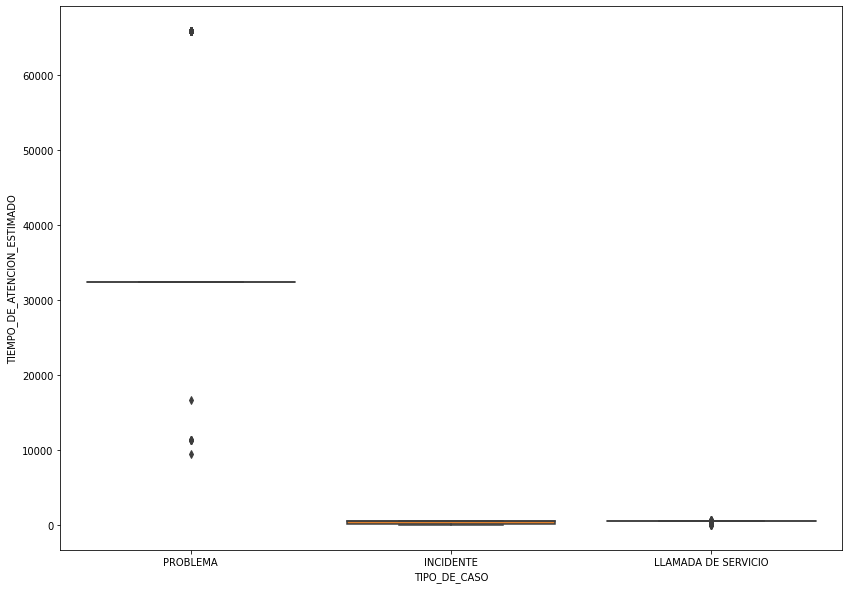

In [ ]:
plt.figure(figsize=(14,10))

sns.boxplot('TIPO_DE_CASO', 'TIEMPO_DE_ATENCION_ESTIMADO', data = dataset)

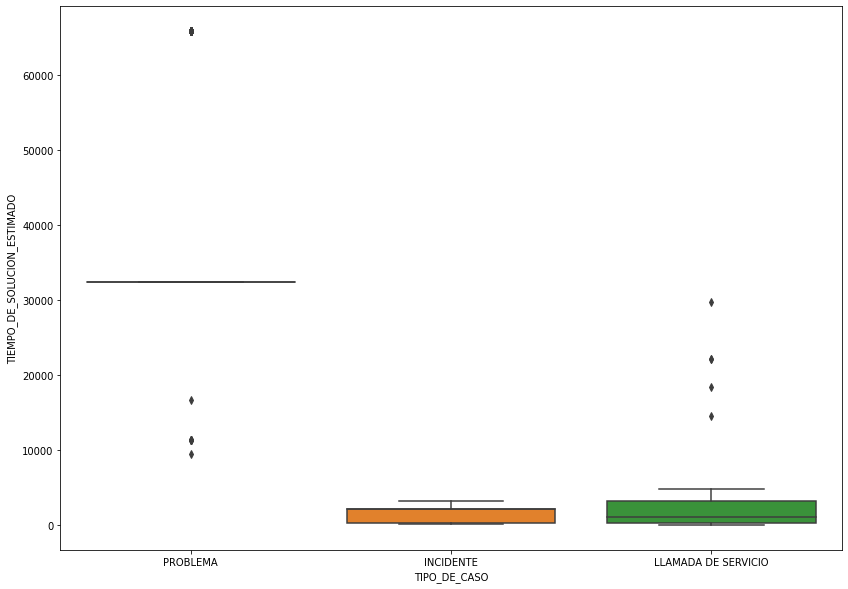

In [ ]:
plt.figure(figsize=(14,10))

sns.boxplot('TIPO_DE_CASO', 'TIEMPO_DE_SOLUCION_ESTIMADO', data = dataset)

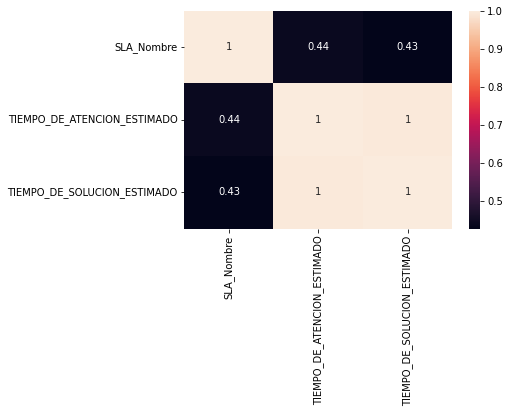

In [ ]:
sns.heatmap(dataset.corr(), annot=True)

## 2.5. Transformación de los datos

In [ ]:
dataset[numerics].describe()

,SLA_Nombre,TIEMPO_DE_ATENCION_ESTIMADO,TIEMPO_DE_SOLUCION_ESTIMADO
count,625.000000,625.000000,625.000000
mean,44.902400,19017.368000,19749.784000
std,55.320584,22096.584578,21575.246845
min,1.000000,0.000000,0.000000
25%,4.000000,540.000000,1080.000000
50%,5.000000,540.000000,4860.000000
75%,120.000000,32400.000000,32400.000000
max,120.000000,65880.000000,65880.000000


In [ ]:
for i in label_encoder:
        le = preprocessing.LabelEncoder()
        le.fit(dataset[i])
        dataset[i] = le.transform(dataset[i])
        globals()["%s_etiquetas" % i] = dict(zip(le.classes_, le.transform(le.classes_)))
        print(globals()["%s_etiquetas" % i])

{'INCIDENTE': 0, 'LLAMADA DE SERVICIO': 1, 'PROBLEMA': 2}
{'CRITICAL': 0, 'HIGH': 1, 'LOW': 2}
{'CRITICAL': 0, 'HIGH': 1, 'LOW': 2, 'MEDIUM': 3}
{'CRITICAL': 0, 'HIGH': 1, 'LOW': 2}


In [ ]:
#i = 'PerfilNombre'
le = preprocessing.OneHotEncoder(sparse=False, drop= 'first')
le_encoder = le.fit_transform(dataset[onehot_encoder])

le_columns = le.get_feature_names(input_features= onehot_encoder)
le_columns
data_encoder = pd.DataFrame(le_encoder, columns= le_columns)
data_encoder.head()

,CATEGORIA_ACR,CATEGORIA_ADMBRANCH,CATEGORIA_Actualizacion de Servidor,CATEGORIA_Actualización de Sistema Operativo,CATEGORIA_Actualizar Politicas de Grupo,CATEGORIA_Adelanto Electronico,CATEGORIA_Adelanto Sueldos,CATEGORIA_Admbranch,CATEGORIA_Aduanas/Sunat,CATEGORIA_Alertas,CATEGORIA_Almacenamiento,CATEGORIA_Anexo Pared 24x7 Inoperativo,CATEGORIA_Anexos Reportes Varios,CATEGORIA_Archivo PST dañado,CATEGORIA_Asignacion de CPU,CATEGORIA_Asignación de Anexo Pared 24x7,CATEGORIA_Asignación de Anexo Telefónico,CATEGORIA_Asignación de Impresora Matricial,CATEGORIA_Asignación de Impresora Térmica,CATEGORIA_Asignación de Monitor,CATEGORIA_Asignación de Pinpad,CATEGORIA_Asignación de Torreta Mesa de Dinero,CATEGORIA_Aumentar capacidad de buzón de correo,CATEGORIA_Aumentar capacidad de envío y recepción de correos,CATEGORIA_Auro,CATEGORIA_Autoriza ATM,CATEGORIA_BIF Leasing,CATEGORIA_BIF Score,CATEGORIA_BIFCPM,CATEGORIA_BIFConvenios,CATEGORIA_BPI Empresas,CATEGORIA_BPI Empresas Repotenciada,CATEGORIA_BPI Personas,CATEGORIA_Backoffice,CATEGORIA_Banca Movil Personas,CATEGORIA_Base de Datos,CATEGORIA_Bifnet,CATEGORIA_Bloqueos,CATEGORIA_Branch,CATEGORIA_CROL,...,GRUPO_ESPECIALISTA_Desarrollo TI Soluciones,GRUPO_ESPECIALISTA_Infraestructura,GRUPO_ESPECIALISTA_Mesa de Ayuda,TIPO_REGISTRO_Chat Center,TIPO_REGISTRO_Mail,TIPO_REGISTRO_Telefonico,TIPO_REGISTRO_Web,SERVICIO_CARPETA COMPARTIDA,SERVICIO_Falla de Aplicación,SERVICIO_Falla de Equipos y perifericos,SERVICIO_Habilitar acceso a Aplicaciones del Negocio,SERVICIO_I_APLICACION DE NEGOCIO (ALTA),SERVICIO_I_APLICACION DE NEGOCIO (BAJA),SERVICIO_I_APLICACION DE NEGOCIO( CRITICA),SERVICIO_I_EVENTO DE MONITOREO,SERVICIO_I_REDES Y COMUNICACIONES,SERVICIO_Instalación y configuración,SERVICIO_R_APLICACION DEL NEGOCIO(3d),SERVICIO_Redes y Comunicaciones,SERVICIO_Requerimientos Tecnológicos,SERVICIO_Restore,SERVICIO_Servico TI,SERVICIO_Telefonía fija,SERVICIO_VPNBANBIF,SERVICIO_VPNPROVEEDORES,ULTIMO_PROBLEMA_ASOCIADO_Ninguno,CAUSA_Crash de Equipo,CAUSA_Data,CAUSA_Desconocimiento Funcional,CAUSA_Error de Prueba,CAUSA_GAP Diseño,CAUSA_GAP Funcional,CAUSA_Mejora Técnica,CAUSA_No Identificado,CAUSA_No se identifica Causa raíz,CAUSA_Pase a Producción,CAUSA_Programación,CAUSA_memoria swap,INCIDENTE_MASIVO_No,CUMPLE_FUERA
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


In [ ]:
df = pd.concat([data_encoder, dataset.drop(onehot_encoder + numerics, axis = 1)], axis = 1)

La tabla final a trabajar es df

In [ ]:
X = df.drop(['TIPO_DE_CASO'], axis = 1)
Y = df['TIPO_DE_CASO']

In [ ]:
rf_clf = RandomForestClassifier(n_estimators=100, random_state =123)

# Train the model
rf_clf.fit(X.values, Y.values.ravel())

## ordenando  las mejores variables
features = []
for feature in zip(X.columns, rf_clf.feature_importances_):
    features.append(feature)

features_total = pd.DataFrame(features,columns=['Variables','Gain']).sort_values('Gain', ascending=False)

sfm = SelectFromModel(rf_clf, threshold=0.006)

# Train the selector
sfm.fit(X, Y)

# Print the names of the most important features

variables = []
for feature_list_index in sfm.get_support(indices=True):
    variables.append(X.columns[feature_list_index])
    #variables

#features_total
variables

['CATEGORIA_BPI Personas',
 'CATEGORIA_PLIN',
 'JERARQUIA_Aplicaciones de Negocio.BPI.BPI Empresas',
 'JERARQUIA_Aplicación de Negocio.Falla interna en Aplicación del Negocio.Aplicaciones Varias.PLIN',
 'JERARQUIA_Aplicación de Negocio.Falla interna en Aplicación del Negocio.BPI.BPI Personas',
 'GRUPO_ESPECIALISTA_Centro de Computo',
 'GRUPO_ESPECIALISTA_Desarrollo TI Canales y CRM',
 'GRUPO_ESPECIALISTA_Desarrollo TI Productos y Servicios Bancarios',
 'GRUPO_ESPECIALISTA_Infraestructura',
 'GRUPO_ESPECIALISTA_Mesa de Ayuda',
 'TIPO_REGISTRO_Chat Center',
 'TIPO_REGISTRO_Mail',
 'TIPO_REGISTRO_Web',
 'SERVICIO_Falla de Aplicación',
 'SERVICIO_I_APLICACION DE NEGOCIO (ALTA)',
 'SERVICIO_I_APLICACION DE NEGOCIO (BAJA)',
 'SERVICIO_I_APLICACION DE NEGOCIO( CRITICA)',
 'SERVICIO_I_EVENTO DE MONITOREO',
 'SERVICIO_I_REDES Y COMUNICACIONES',
 'SERVICIO_Instalación y configuración',
 'ULTIMO_PROBLEMA_ASOCIADO_Ninguno',
 'CAUSA_Mejora Técnica',
 'CAUSA_No Identificado',
 'CAUSA_Pase a Producci

In [ ]:
print(len(variables))
print(len(X.columns))

27
392


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, Y,test_size=0.25, random_state=1,stratify= Y)

In [ ]:
## Métricas de los modelos
from sklearn.metrics import confusion_matrix
from sklearn.metrics import auc
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report

In [ ]:
data.TIPO_DE_CASO.value_counts()

PROBLEMA               309
INCIDENTE              232
LLAMADA DE SERVICIO    100
Name: TIPO_DE_CASO, dtype: int64

In [ ]:
model1 = LGBMClassifier()     ## Modelo LightGBM
model1.fit(X_train[variables], y_train)

model2 = XGBClassifier()        ## Modelo XGBoost
model2.fit(X_train[variables], y_train)

model3 = CatBoostClassifier()        ## Modelo CatBoost
model3.fit(X_train[variables], y_train)

model4 = RandomForestClassifier()        ## Modelo RandomForest
model4.fit(X_train[variables], y_train)


## train
yt1 = model1.predict(X_train[variables])
yt2 = model2.predict(X_train[variables])
yt3 = model3.predict(X_train[variables])
yt4 = model4.predict(X_train[variables])

# test
y1 = model1.predict(X_test[variables])
y2 = model2.predict(X_test[variables])
y3 = model3.predict(X_test[variables])
y4 = model4.predict(X_test[variables])

In [ ]:
print(classification_report(y_test, y1))

              precision    recall  f1-score   support

           0       1.00      0.88      0.93        57
           1       0.89      1.00      0.94        25
           2       0.95      1.00      0.97        75

    accuracy                           0.96       157
   macro avg       0.95      0.96      0.95       157
weighted avg       0.96      0.96      0.95       157



In [ ]:
print(classification_report(y_test, y2))

              precision    recall  f1-score   support

           0       1.00      0.89      0.94        57
           1       0.96      1.00      0.98        25
           2       0.94      1.00      0.97        75

    accuracy                           0.96       157
   macro avg       0.97      0.96      0.96       157
weighted avg       0.96      0.96      0.96       157



In [ ]:
print(classification_report(y_test, y3))

              precision    recall  f1-score   support

           0       1.00      0.86      0.92        57
           1       0.93      1.00      0.96        25
           2       0.93      1.00      0.96        75

    accuracy                           0.95       157
   macro avg       0.95      0.95      0.95       157
weighted avg       0.95      0.95      0.95       157



In [ ]:
print(classification_report(y_test, y4))

              precision    recall  f1-score   support

           0       0.98      0.84      0.91        57
           1       0.93      1.00      0.96        25
           2       0.91      0.99      0.95        75

    accuracy                           0.94       157
   macro avg       0.94      0.94      0.94       157
weighted avg       0.94      0.94      0.94       157



In [ ]:
print(accuracy_score(y_train, yt1))
print(accuracy_score(y_test, y1))

0.9594017094017094
0.9554140127388535


In [ ]:
print(accuracy_score(y_train, yt2))
print(accuracy_score(y_test, y2))

0.9658119658119658
0.9617834394904459


In [ ]:
print(accuracy_score(y_train, yt3))
print(accuracy_score(y_test, y3))

0.9700854700854701
0.9490445859872612


In [ ]:
print(accuracy_score(y_train, yt4))
print(accuracy_score(y_test, y4))

0.9700854700854701
0.9363057324840764


In [ ]:
from pprint import pprint
# Look at parameters used by our current forest
print('Parameters currently in use:\n')
pprint(best_model.get_params())

In [ ]:
best_X_train = X_train[variables]
best_X_test  = X_test[variables]

# ***Best model***


In [ ]:
# Initialize and fit the model
best_model = XGBClassifier()
best_model.fit(best_X_train, y_train)



XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='multi:softprob', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [ ]:

# Separate the features and the target variable
predict_train_lg = best_model.predict_proba(best_X_train)[:,1]
predict_test_lg = best_model.predict_proba(best_X_test)[:,1]



# Cross Validation and Optimización de Modelos

In [ ]:
from pprint import pprint
# Look at parameters used by our current forest
print('Parameters currently in use:\n')
pprint(best_model.get_params())

Parameters currently in use:

{'base_score': 0.5,
 'booster': 'gbtree',
 'colsample_bylevel': 1,
 'colsample_bynode': 1,
 'colsample_bytree': 1,
 'gamma': 0,
 'learning_rate': 0.1,
 'max_delta_step': 0,
 'max_depth': 3,
 'min_child_weight': 1,
 'missing': None,
 'n_estimators': 100,
 'n_jobs': 1,
 'nthread': None,
 'objective': 'multi:softprob',
 'random_state': 0,
 'reg_alpha': 0,
 'reg_lambda': 1,
 'scale_pos_weight': 1,
 'seed': None,
 'silent': None,
 'subsample': 1,
 'verbosity': 1}


# Random Hyperparameter Grid

In [ ]:
# Number of trees in random forest
iterations = [int(x) for x in np.linspace(start = 500, stop = 2500, num = 10)]
# Metrics eval
colsample_bytree = [0.6, 0.7, 0.8 , 0.9, 1]
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(3, 10, num = 5)]
max_depth.append(None)
# Method of selecting samples for training each tree
learning_rate = [0.05, 0.1, 0.15 ,0.2]
# Create the random grid
random_grid = {'iterations': iterations,
               'colsample_bytree': colsample_bytree,
               'max_depth': max_depth,
               'learning_rate': learning_rate}
pprint(random_grid)

{'colsample_bytree': [0.6, 0.7, 0.8, 0.9, 1],
 'iterations': [500, 722, 944, 1166, 1388, 1611, 1833, 2055, 2277, 2500],
 'learning_rate': [0.05, 0.1, 0.15, 0.2],
 'max_depth': [3, 4, 6, 8, 10, None]}


In [ ]:
best_X= X[variables]
best_X.columns

Index(['CATEGORIA_BPI Personas', 'CATEGORIA_PLIN',
       'JERARQUIA_Aplicaciones de Negocio.BPI.BPI Empresas',
       'JERARQUIA_Aplicación de Negocio.Falla interna en Aplicación del Negocio.Aplicaciones Varias.PLIN',
       'JERARQUIA_Aplicación de Negocio.Falla interna en Aplicación del Negocio.BPI.BPI Personas',
       'GRUPO_ESPECIALISTA_Centro de Computo',
       'GRUPO_ESPECIALISTA_Desarrollo TI Canales y CRM',
       'GRUPO_ESPECIALISTA_Desarrollo TI Productos y Servicios Bancarios',
       'GRUPO_ESPECIALISTA_Infraestructura',
       'GRUPO_ESPECIALISTA_Mesa de Ayuda', 'TIPO_REGISTRO_Chat Center',
       'TIPO_REGISTRO_Mail', 'TIPO_REGISTRO_Web',
       'SERVICIO_Falla de Aplicación',
       'SERVICIO_I_APLICACION DE NEGOCIO (ALTA)',
       'SERVICIO_I_APLICACION DE NEGOCIO (BAJA)',
       'SERVICIO_I_APLICACION DE NEGOCIO( CRITICA)',
       'SERVICIO_I_EVENTO DE MONITOREO', 'SERVICIO_I_REDES Y COMUNICACIONES',
       'SERVICIO_Instalación y configuración',
       'ULTIMO_PROB

In [ ]:
XGB_random = RandomizedSearchCV(estimator = best_model, param_distributions = random_grid, cv = 5, verbose=2, random_state=1400, n_jobs = -1)
# Fit the random search model
XGB_random.fit(best_X, Y)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    5.6s finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                           colsample_bylevel=1,
                                           colsample_bynode=1,
                                           colsample_bytree=1, gamma=0,
                                           learning_rate=0.1, max_delta_step=0,
                                           max_depth=3, min_child_weight=1,
                                           missing=None, n_estimators=100,
                                           n_jobs=1, nthread=None,
                                           objective='multi:softprob',
                                           random_state=0, reg_alpha=0,
                                           reg_lambda=1, sca...
                                           seed=None, silent=None, subsample=1,
                                           verbosity=1),
                   iid='deprecated', n_i

In [ ]:
def evaluate(model, test_features, test_labels):
    predictions = model.predict(test_features)
    accuracy = accuracy_score(test_labels,predictions)
    print('Model Performance')
    print('Accuracy = {:.12g}%.'.format(accuracy))
    return accuracy

In [ ]:
base_accuracy = evaluate(best_model, best_X_test, y_test)

best_random = lgb_random.best_estimator_
best_random.fit(best_X_train, y_train)
random_accuracy = evaluate(best_random, best_X_test, y_test)
print('Improvement of {:.12g}%.'.format( 100 * (random_accuracy - base_accuracy) / base_accuracy))

Model Performance
Accuracy = 0.96178343949%.
Model Performance
Accuracy = 0.955414012739%.
Improvement of -0.662251655629%.


# Grid Search with Cross Validation

In [ ]:
# Number of trees in random forest
iterations = [300, 400, 500, 600]
# Metrics eval
colsample_bytree = [0.7, 0.8, 0.9]
# Maximum number of levels in tree
max_depth = [4, 6, 8]
# Method of selecting samples for training each tree
learning_rate = [0.1, 0.15 ,0.2]
# Create the random grid
param_grid = {'iterations': iterations,
               'colsample_bytree': colsample_bytree,
               'max_depth': max_depth,
               'learning_rate': learning_rate}
pprint(param_grid)

{'colsample_bytree': [0.7, 0.8, 0.9],
 'iterations': [300, 400, 500, 600],
 'learning_rate': [0.1, 0.15, 0.2],
 'max_depth': [4, 6, 8]}


In [ ]:
grid_search = GridSearchCV(estimator = best_model, param_grid = param_grid, cv = 5, n_jobs = -1, verbose = 2)
# Fit the grid search to the data
grid_search.fit(best_X, Y)
grid_search.best_params_

Fitting 5 folds for each of 108 candidates, totalling 540 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:    4.6s
[Parallel(n_jobs=-1)]: Done 158 tasks      | elapsed:   19.4s
[Parallel(n_jobs=-1)]: Done 361 tasks      | elapsed:   46.1s
[Parallel(n_jobs=-1)]: Done 540 out of 540 | elapsed:  1.2min finished


{'colsample_bytree': 0.7,
 'iterations': 300,
 'learning_rate': 0.15,
 'max_depth': 6}

In [ ]:
best_grid = grid_search.best_estimator_
grid_accuracy = evaluate(best_grid, best_X_test, y_test)
print('Improvement of {:.12g}%.'.format( 100 * (grid_accuracy - base_accuracy) / base_accuracy))

Model Performance
Accuracy = 0.980891719745%.
Improvement of 1.98675496689%.
